In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [3]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")


matches.head(), deliveries.head()


(       id   season        city        date match_type player_of_match  \
 0  335982  2007/08   Bangalore  18-04-2008     League     BB McCullum   
 1  335983  2007/08  Chandigarh  19-04-2008     League      MEK Hussey   
 2  335984  2007/08       Delhi  19-04-2008     League     MF Maharoof   
 3  335985  2007/08      Mumbai  20-04-2008     League      MV Boucher   
 4  335986  2007/08     Kolkata  20-04-2008     League       DJ Hussey   
 
                                         venue                        team1  \
 0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
 1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
 2                            Feroz Shah Kotla             Delhi Daredevils   
 3                            Wankhede Stadium               Mumbai Indians   
 4                                Eden Gardens        Kolkata Knight Riders   
 
                          team2                  toss_winner toss_decision  \


In [4]:
print("Matches shape:", matches.shape)
print("Deliveries shape:", deliveries.shape)
print("\nMatches columns:\n", matches.columns)
print("\nDeliveries columns:\n", deliveries.columns)


Matches shape: (1095, 20)
Deliveries shape: (152840, 17)

Matches columns:
 Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

Deliveries columns:
 Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [5]:
matches_per_season = matches.groupby("season")["id"].count()
matches_per_season


,id
season,
2007/08,58
2009,57
2009/10,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


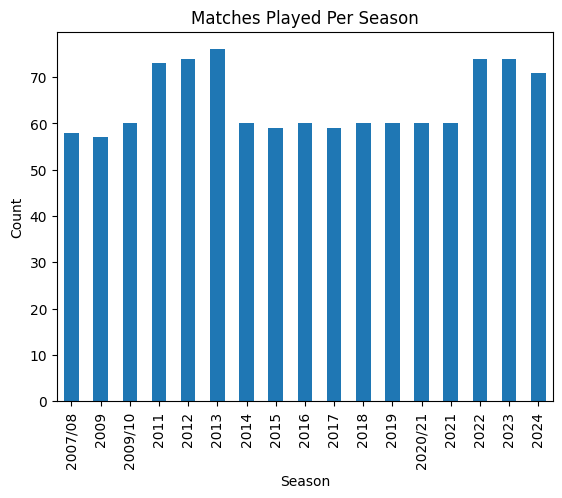

In [6]:
matches_per_season.plot(kind="bar")
plt.title("Matches Played Per Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()


In [7]:
top_teams = matches["winner"].value_counts().head(10)
top_teams


,count
winner,
Mumbai Indians,144
Chennai Super Kings,138
Kolkata Knight Riders,131
Royal Challengers Bangalore,116
Rajasthan Royals,112
Sunrisers Hyderabad,88
Kings XI Punjab,88
Delhi Daredevils,67
Delhi Capitals,48


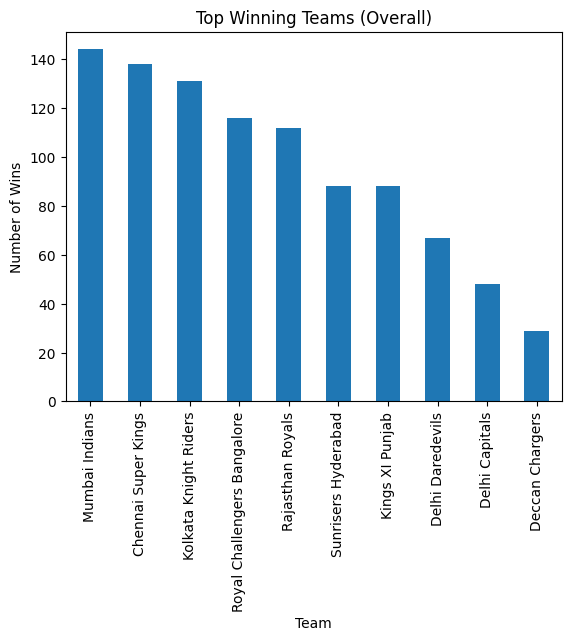

In [8]:
top_teams.plot(kind="bar")
plt.title("Top Winning Teams (Overall)")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.show()


In [9]:
mom = matches["player_of_match"].value_counts().head(10)
mom


,count
player_of_match,
AB de Villiers,25
CH Gayle,22
RG Sharma,19
V Kohli,18
DA Warner,18
MS Dhoni,17
YK Pathan,16
RA Jadeja,16
SR Watson,16


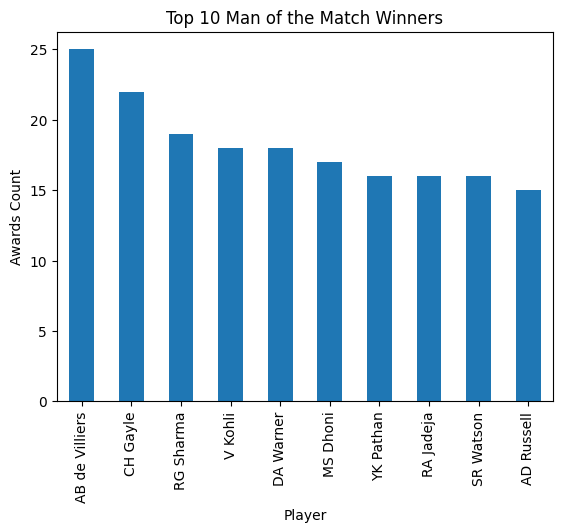

In [10]:
mom.plot(kind="bar")
plt.title("Top 10 Man of the Match Winners")
plt.xlabel("Player")
plt.ylabel("Awards Count")
plt.xticks(rotation=90)
plt.show()


In [12]:
total_runs = deliveries.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)
total_runs

,batsman_runs
batter,
SK Raina,4566.0
V Kohli,4475.0
RG Sharma,4251.0
G Gambhir,4202.0
DA Warner,4014.0
RV Uthappa,3823.0
S Dhawan,3691.0
CH Gayle,3651.0
MS Dhoni,3591.0


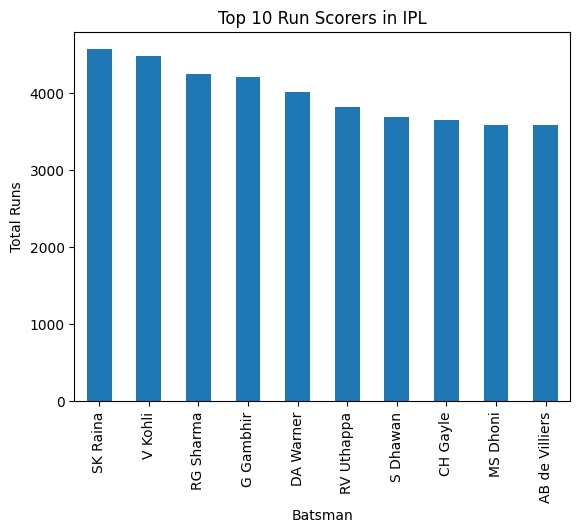

In [13]:
total_runs.plot(kind="bar")
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.xticks(rotation=90)
plt.show()


In [15]:
# Balls faced
balls_faced = deliveries.groupby("batter")["ball"].count()

# Runs scored
runs_scored = deliveries.groupby("batter")["batsman_runs"].sum()

strike_rate = (runs_scored / balls_faced) * 100
strike_rate_top = strike_rate.sort_values(ascending=False).head(10)
strike_rate_top

,0
batter,
B Stanlake,250.000000
Umar Gul,205.263158
DL Chahar,200.000000
RS Sodhi,200.000000
Shahid Afridi,176.086957
I Malhotra,175.000000
AD Russell,169.801980
CR Brathwaite,169.642857
BCJ Cutting,168.354430


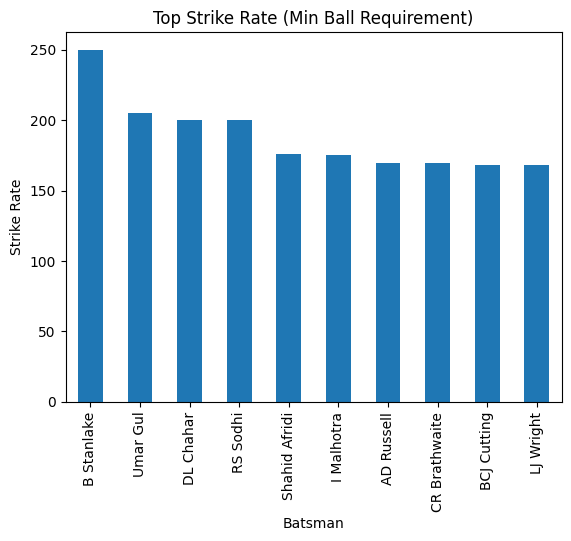

In [16]:
strike_rate_top.plot(kind="bar")
plt.title("Top Strike Rate (Min Ball Requirement)")
plt.xlabel("Batsman")
plt.ylabel("Strike Rate")
plt.xticks(rotation=90)
plt.show()


In [18]:
fours = deliveries[deliveries["batsman_runs"] == 4].groupby("batter")["batsman_runs"].count()
sixes = deliveries[deliveries["batsman_runs"] == 6].groupby("batter")["batsman_runs"].count()

fours_sixes = pd.concat([fours, sixes], axis=1).fillna(0)
fours_sixes.columns = ["Fours", "Sixes"]
fours_sixes.sort_values(by="Sixes", ascending=False).head(10)

,Fours,Sixes
batter,,
CH Gayle,297.0,266.0
RG Sharma,358.0,175.0
SK Raina,402.0,175.0
AB de Villiers,290.0,167.0
V Kohli,389.0,161.0
DA Warner,401.0,160.0
MS Dhoni,252.0,157.0
KA Pollard,161.0,150.0
YK Pathan,244.0,150.0


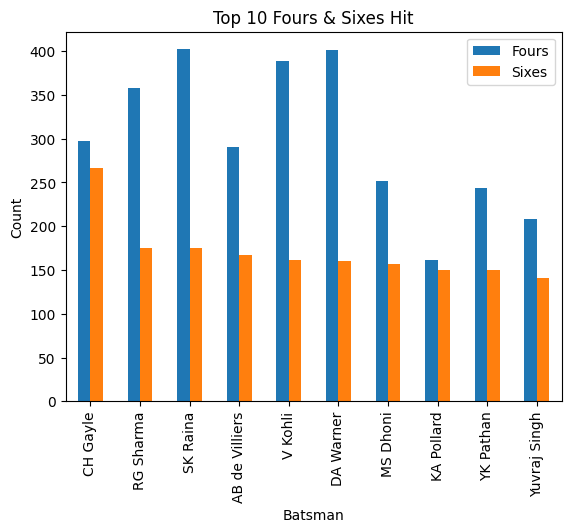

In [19]:
fours_sixes.sort_values(by="Sixes", ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Fours & Sixes Hit")
plt.xlabel("Batsman")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


In [20]:
bowler_runs = deliveries.groupby("bowler")["total_runs"].sum()
bowler_balls = deliveries.groupby("bowler")["ball"].count()

economy_rate = bowler_runs / (bowler_balls/6)
economy_rate_top = economy_rate.sort_values().head(10)
economy_rate_top


,0
bowler,
AC Gilchrist,0.000000
NB Singh,4.320000
Sachin Baby,4.800000
AM Rahane,5.000000
SS Mundhe,5.142857
LA Carseldine,5.142857
Mohammad Nabi,5.363636
DJ Thornely,5.454545
Avesh Khan,6.000000


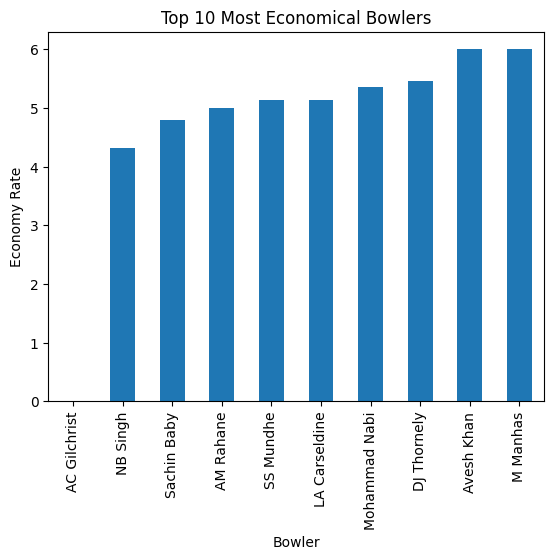

In [21]:
economy_rate_top.plot(kind="bar")
plt.title("Top 10 Most Economical Bowlers")
plt.xlabel("Bowler")
plt.ylabel("Economy Rate")
plt.xticks(rotation=90)
plt.show()


In [22]:
wins = matches["winner"].value_counts()
total_matches = matches["team1"].value_counts() + matches["team2"].value_counts()
win_percentage = (wins / total_matches) * 100
win_percentage.sort_values(ascending=False).head(10)


,count
Rising Pune Supergiant,62.500000
Gujarat Titans,62.222222
Chennai Super Kings,57.983193
Mumbai Indians,55.172414
Lucknow Super Giants,54.545455
Delhi Capitals,52.747253
Kolkata Knight Riders,52.191235
Rajasthan Royals,50.678733
Sunrisers Hyderabad,48.351648
Royal Challengers Bangalore,48.333333


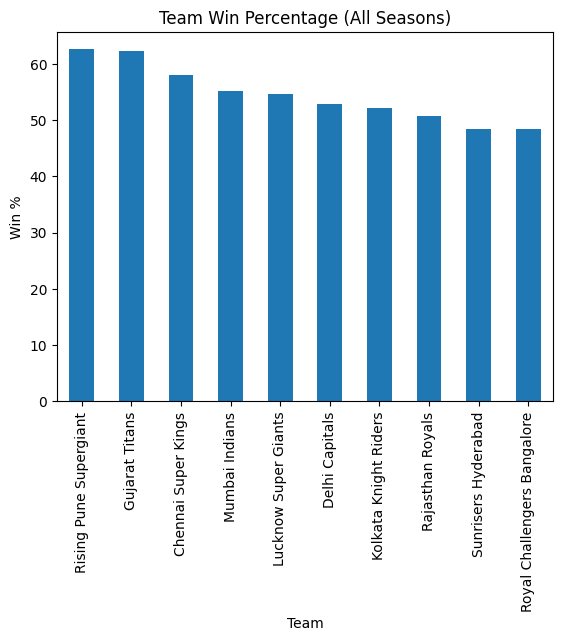

In [23]:
win_percentage.sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Team Win Percentage (All Seasons)")
plt.xlabel("Team")
plt.ylabel("Win %")
plt.xticks(rotation=90)
plt.show()


## 🏏 IPL Analysis Insights

1. 📅 Matches have increased over seasons.
2. 🏆 Mumbai Indians & CSK appear among top winners.
3. 🔥 Virat Kohli, Suresh Raina lead in total runs.
4. 💨 Best economical bowlers show bowling strength.
5. 📊 Teams with high strike batsmen dominate.


# 📄 Visual Summary & Key Insights (Project 2 – IPL Analysis)

## 📊 Visual Highlights
- Top Run Scorers (Bar Chart)
- Team Win Rates (Bar Chart / Line Chart)
- Player Performance Across Seasons

## 💡 Key Insights
- A small group of players consistently dominate run scoring.
- Certain teams show higher win rates across multiple seasons.
- Player performance varies significantly across seasons, indicating form and conditions impact.

## ✅ Takeaways
- Teams should prioritize consistent performers.
- Season-wise analysis helps identify peak player performance.
- Data-driven selection improves match outcomes.
